# **0.Introduction**
#### Team Members: Xinyi Hu, Zijing Wu

![airbnb](http://www.dgtlnk.com/wp-content/uploads/airbnb_logo_4things.png)

Airbnb housing prices are known to fluctuate a lot based on various factors like time of the year, location, time length of staying, room type (e.g., single room or the entire house), and even prior guest reviews. 

Such price difference may seem too complicated to notice a pattern at first sight, but with sufficient data collected and in-depth analysis, we believe that we can unearth certain trend. If so, we can reach at many inspiring conclusions such as which factor contributes the most to Airbnb housing price, whether hosts are overpricing or underpricing their houses/rooms, etc. 

# **1.Data Loading and Cleaning**
##### Link to London Airbnb Price Information: https://www.kaggle.com/labdmitriy/airbnb
We have in total six datasets (stored in csv format) that record more than 80,000 different Airbnb housings located in London. The datasets contain various information like housing id, location, price, and guest reviews.


In [ ]:
#%%capture
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from wordcloud import STOPWORDS, WordCloud
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder

In [ ]:
%%capture
!pip install kaggle
!mkdir ~/.kaggle

with open('/content/kaggle.json', 'w') as f:
  f.write('{"username":"xinyihu1220","key":"8450572c2a2200313652ecd9451e3a12"}')

!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d labdmitriy/airbnb
!unzip "/content/airbnb.zip" -d "/content/"

In [ ]:
neighbourhoods = pd.read_csv('neighbourhoods.csv')
listings_summary = pd.read_csv('listings_summary.csv')
calendar = pd.read_csv('calendar.csv')
listings = pd.read_csv('listings.csv')
reviews_summary = pd.read_csv('reviews_summary.csv')
reviews = pd.read_csv('reviews.csv')

### **1.1 Data Cleaning for "neighbourhoods" dataset**

> "Neighbourhoods" contains two columns: neighbourhood_group and neighbourhood.



In [ ]:
neighbourhoods.head(3)

,neighbourhood_group,neighbourhood
0,NaN,Barking and Dagenham
1,NaN,Barnet
2,NaN,Bexley


In [ ]:
neighbourhoods['neighbourhood_group'].notna().sum()

0

Since all the values in the column "neighbourhood_group" are NaN, we decide to drop this column

In [ ]:
neighbourhoods = neighbourhoods.drop(columns='neighbourhood_group')

In [ ]:
print("Neighbourhoods Dataset Summary:")
print("Number of rows in total:", neighbourhoods.shape[0])
print("Number of rows with duplicated values is", neighbourhoods['neighbourhood'].duplicated().sum())

Neighbourhoods Dataset Summary:
Number of rows in total: 33
Number of rows with duplicated values is 0


After preliminrary data cleansing, *neighbourhoods* is now a dataset that contains 33 distinct location names, each representing a neighbourhood in London

### **1.2 Data Cleaning for "listings_summary" dataset**
> "Listings_summary" contains 16 columns.

In [ ]:
listings_summary['neighbourhood_group'].notna().sum()

0

All the values in the column "neighbourhood_group" are NaN, thus we decide to drop this column

In [ ]:
listings_summary = listings_summary.drop(columns='neighbourhood_group')

In [ ]:
listings_summary.isnull().sum()

id                                    0
name                                 25
host_id                               0
host_name                            12
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       20006
reviews_per_month                 20006
calculated_host_listings_count        0
availability_365                      0
dtype: int64

Unhelpful columns: host_name and host_id do not help us to predict the housing price, nor do they provide any additional help to identify each house/room because we already have "id" for each house/room. Therefore, we decide to drop these two columns

In [ ]:
listings_summary.drop(columns=['host_id','host_name'],inplace=True)

The column "last_review" records the date when the latest guest review is posted, but the whole dataset is collected about two years ago and the "last_review" information is already out-dated. Thus, the "last_review" column provides little help to price predicition and we decide to drop it.

In [ ]:
listings_summary.drop(columns='last_review',inplace=True)

In [ ]:
listings_summary.shape[0]

85068

After preliminary data cleansing, *listings_summary* is a dataset that contains the ID, neighbourhood, specific location (latitude and longitude), room type, price, minimum_nights, total number of reviews, average number of reviews per month, and availability in a year for in total 85,068 Airbnb housing in London.

### **1.3 Data Cleaning for "listings" dataset**
> "Listings" contains 106 columns.

In [ ]:
print("Listings dataset Summary:")
print("Number of rows:", listings.shape[0])
print("Number of columns:", listings.shape[1])

Listings dataset Summary:
Number of rows: 85068
Number of columns: 106


#### 1.3.1 Visualize common words in Housing's **Names**

In [ ]:
temp = listings.copy()
temp['name'] = temp['name'].str.replace('London',' ')
temp['name'] = temp['name'].str.replace('Apartment',' ')
temp['name'] = temp['name'].str.replace('APARTMENT',' ')
temp['name'] = temp['name'].str.replace('room',' ')
temp['name'] = temp['name'].str.replace('Room',' ')
temp['name'] = temp['name'].str.replace('2',' ')

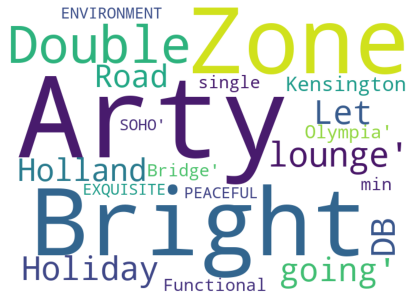

In [ ]:
text = temp['name'].values
text = str(text)
stopwords = set(STOPWORDS)
name_wc = WordCloud(width = 700, height = 500, stopwords=stopwords, background_color="white").generate(text)
plt.figure(figsize = (7, 4), facecolor = None) 
plt.imshow(name_wc)
plt.axis("off") 
plt.tight_layout(pad = 0)

#### 1.3.2 Visualize common words in **Transit Information**

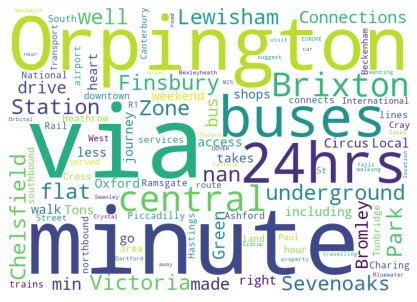

In [ ]:
temp = listings.copy()
temp['transit'] = temp['transit'].str.replace('London',' ')
text = temp['transit'].values
text = str(text)
stopwords = set(STOPWORDS)
name_wc = WordCloud(width = 700, height = 500, stopwords=stopwords, background_color="white").generate(text)
plt.figure(figsize = (7, 4), facecolor = None) 
plt.imshow(name_wc)
plt.axis("off") 
plt.tight_layout(pad = 0)

#### 1.3.3 **Drop unhelpful columns**
> Since "listings" contains more than 100 columns, we decide to carefully examine each column and drop those that are irrelevant to our project.

In [ ]:
print("Number of rows in total: ", listings.shape[0])
print("Number of duplicated values in column 'last_scraped': ", listings['last_scraped'].duplicated().sum())
# Almost all the values in the column "last_scraped" are the same, this makes sense since the dataset is scraped on the same day
# However, since almost all the values are the same, we do not need to keep it as it won't help to predict the price
listings = listings.drop(columns = 'last_scraped')

Number of rows in total:  85068
Number of duplicated values in column 'last_scraped':  85066


In [ ]:
# from manual inspection, the following columns are not indicative of housing prices, adnd thus we decide to drop them
listings = listings.drop(columns = ['has_availability','listing_url', 'scrape_id','thumbnail_url','medium_url','picture_url','xl_picture_url','host_url','host_name','host_thumbnail_url','host_picture_url','neighbourhood_group_cleansed'])

In [ ]:
print("Number of valid values in the column 'host_acceptance rate:'", listings['host_acceptance_rate'].notna().sum())
# since the value is zero, the column "host_acceptance_rate" only contains null value, therefore we drop this column
listings.drop(columns='host_acceptance_rate', inplace=True)

Number of valid values in the column 'host_acceptance rate:' 0


In [ ]:
# adjust column data type
print("Number of rows with null values in 'host_response_rate' column:",listings['host_response_rate'].isnull().sum())
# fill NaN with zero
listings['host_response_rate'] = listings['host_response_rate'].fillna("0")
# remove percentage sign and change the column type to float
listings['host_response_rate'] = listings['host_response_rate'].str.replace("%","").astype(float)

Number of rows with null values in 'host_response_rate' column: 25900


In [ ]:
print("Total number of rows in total: ",listings.shape[0])
print("Number of duplicated values in the column 'is_location_exact':", listings['is_location_exact'].duplicated().sum())
## since the number of column of LISTINGS is 85,068, and only two of these columns have the value "F(alse)", while the remaining are all "T(rue)"
# this column does not provide much useful information for price prediction because there's no distinct diaprity between different houses on the subject of "whether the location is exact"
# Therefore, we decide not to include this category of info in our prediction model
listings = listings.drop(columns='is_location_exact')

Total number of rows in total:  85068
Number of duplicated values in the column 'is_location_exact': 85066


In [ ]:
# Use "country_code" column to drop invalid housing records
print("Total number of rows in listings dataset:", listings.shape[0])
print("Number of rows under the column 'country_code' that have the value 'GB' (Great Britain):", listings['country_code'].duplicated().sum())

Total number of rows in listings dataset: 85068
Number of rows under the column 'country_code' that have the value 'GB' (Great Britain): 85065


In [ ]:
# Inspect the three instances where country_code is not GB. These cases are suspicious because the original data is scrapted from Airbnb housing in London
listings[listings['country_code']!='GB']

,id,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,host_id,host_since,host_location,host_about,host_response_time,host_response_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,property_type,room_type,accommodates,...,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
41783,23325697,Can torres,M7 minutes to Ibiza Town,NaN,M7 minutes to Ibiza Town,none,NaN,NaN,NaN,NaN,NaN,NaN,85507414,2016-07-23,"England, United Kingdom",NaN,NaN,0.0,f,NaN,2.0,2.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,f,"Ibiza, Baleares, Spain",LB of Wandsworth,Wandsworth,Ibiza,Baleares,07814,London,"Ibiza, Spain",ES,Spain,51.47145,-0.14136,Villa,Entire home/apt,8,...,1,$0.00,8,59,8,8,59,59,8.0,59.0,18 months ago,23,53,83,173,2019-11-06,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t,NaN,NaN,t,f,flexible,f,f,1,1,0,0,NaN
57006,30320965,"Chambre idéal pour couple, 10min à pied de Camden",Chambre lumineuse très bien situé à 7min à pie...,L’appartement est calme et très bien situé pou...,Chambre lumineuse très bien situé à 7min à pie...,none,Vous trouverez une station de métro (Kentish T...,NaN,NaN,Vous disposerez en plus de la chambre d’une cu...,Je suis disponible par sms ou téléphone dès qu...,Entretenir la chambre et les pièces communes a...,63917372,2016-03-21,"Biarritz, Nouvelle-Aquitaine, France",NaN,NaN,0.0,f,NaN,1.0,1.0,"['email', 'phone']",t,f,"Londres, France",LB of Camden,Camden,Londres,NaN,NW5 4RG,London,"Londres, France",FR,France,51.54894,-0.14564,Condominium,Private room,2,...,1,$0.00,1,30,1,1,30,30,1.0,30.0,10 months ago,0,0,0,0,2019-11-05,1,1,2019-01-03,2019-01-03,100.0,10.0,10.0,10.0,10.0,10.0,8.0,t,NaN,"{""translation missing: en.occupancy.taxes.juri...",f,f,flexible,f,f,1,0,1,0,0.1
61178,32394504,"Cosy one bedroom , near station Edgware",NaN,NaN,NaN,none,NaN,NaN,NaN,NaN,NaN,NaN,223329904,2018-10-30,"London, England, United Kingdom",NaN,NaN,0.0,f,NaN,2.0,2.0,['phone'],t,f,"Edgware , France",LB of Barnet,Barnet,Edgware,NaN,HA87ft,London,"Edgware , France",FR,France,51.61303,-0.28099,Apartment,Private room,1,...,1,$0.00,30,1125,30,30,1125,1125,30.0,1125.0,7 months ago,29,59,89,89,2019-11-06,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t,NaN,"{""translation missing: en.occupancy.taxes.juri...",f,f,flexible,f,f,2,1,1,0,NaN


Since these three rows' 'country' column (having value 'Spain' or 'France') indicates that none of these housing is located in London, we decide to drop these three rows.

In [ ]:
listings = listings[listings['country_code']=='GB']
listings.drop(columns='country_code',inplace=True)

In [ ]:
print("Listings Dataset Summary:")
print("Total number of rows:", listings.shape[0])
print("Total number of columns:", listings.shape[1])

Listings Dataset Summary:
Total number of rows: 85065
Total number of columns: 90


### **1.4 Data Cleaning for "calendar" dataset**
> "Calendar" contains 7 columns.

In [ ]:
calendar.head(3)

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,11551,2019-11-06,f,$105.00,$105.00,3.0,180.0
1,90700,2019-11-06,f,$125.00,$125.00,90.0,1125.0
2,90700,2019-11-07,f,$125.00,$125.00,90.0,1125.0


In [ ]:
print("Calendar has in total", calendar.shape[0] - calendar['date'].duplicated().sum(), "days of reords.")

Calendar has in total 366 days of reords.


Drop the "available" column in calendar because the recorded availability only reflects whether the room can be rented on the day when the data was scraped, thus it provides no indicative information to price prediction

In [ ]:
calendar = calendar.drop(columns='available')

In [ ]:
# check for number of columns
print("Number of rows in total:", calendar.shape[0])
print("Number of rows that have duplicated values in 'listing_id' column:", calendar['listing_id'].duplicated().sum())

Number of rows in total: 31050094
Number of rows that have duplicated values in 'listing_id' column: 30965026


Since the number of duplicated values are almost the same as the total number of values in this column, we learned that there msut be multiple records for the same room. This is because the same room is posted multiple times on different dates. 

#### 1.4.1 **Difference between *Price* and *Adjusted Price***
##### Notice that 'price' is documented as string, containing dollar sign and comma, we want to transform this column of data into float.


In [ ]:
calendar['price'] = calendar['price'].str.replace('$','').str.replace(',','').astype('float')
calendar['adjusted_price'] = calendar['adjusted_price'].str.replace('$','').str.replace(',','').astype('float')

In [ ]:
diff = calendar[calendar['price']!=calendar['adjusted_price']]
print("There are", diff.shape[0], "records of housing where the adjusted price is not equal to the original price.")

There are 201477 records of housing where the adjusted price is not equal to the original price.


Since there are more than 200,000 cases where adjusted prices don't match with original prices, we decide to use adjusted_price column to reflect the actual price.

In [ ]:
calendar.drop(columns='price',inplace=True)
calendar.rename(columns = {'adjusted_price' : 'price'}, inplace = True)

#### 1.4.2 **Visualize price change by time**

We randomly select two housings to demonstrate the trend of price change by time.

Example 1: Housing with listing_id 90700

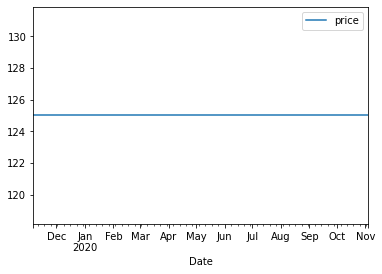

In [ ]:
example = calendar[calendar['listing_id']==90700]
example = example[['date','price']]
from datetime import datetime
example['Date']=example['date'].apply(lambda x:datetime.strptime(x,'%Y-%m-%d'))
example=example.drop(columns=['date']).set_index('Date')
example.plot()

The above graph shows that this housing's price has not changed at all throughout the whole year.

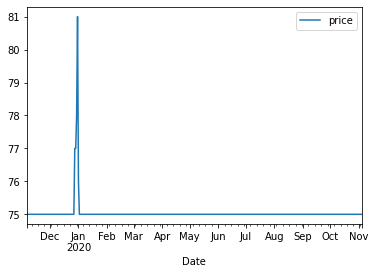

In [ ]:
example_2 = calendar[calendar['listing_id']==92399]
example_2 = example_2[['date','price']]
example_2['Date']=example_2['date'].apply(lambda x:datetime.strptime(x,'%Y-%m-%d'))
example_2=example_2.drop(columns=['date']).set_index('Date')
example_2.plot()

The above graph shows that this housing's price is almost static from November, 2019 to November, 2020. 

However, there's a noticeable spike in the price during January, 2020.

In [ ]:
calendar.head(3)

,listing_id,date,price,minimum_nights,maximum_nights
0,11551,2019-11-06,105.0,3.0,180.0
1,90700,2019-11-06,125.0,90.0,1125.0
2,90700,2019-11-07,125.0,90.0,1125.0


After preliminary data cleansing, calendar is a dataset that records the ID, adjusted_price (the column has been re-named to "price"), mininum and maximum number of nights that the room/house can be booked.

### **1.5 Data Cleaning for "reviews_summary" dataset**
> "Reviews_summary" contains 2 columns.

In [ ]:
reviews_summary.head(3)

,listing_id,date
0,11551,2010-03-21
1,38407,2010-09-22
2,38407,2010-11-02


### **1.6 Data Cleaning for "reviews" dataset**
> "Reviews" contains 6 columns.

In [ ]:
reviews.head(3)

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,11551,30672,2010-03-21,93896,Shar-Lyn,"The flat was bright, comfortable and clean and..."
1,11551,32236,2010-03-29,97890,Zane,We stayed with Adriano and Valerio for a week ...
2,90700,337227,2011-06-27,311071,Miqua,it was all in all the perfect week!\r\nchilton...


From the above inspection, we can see that *reviews_summary* dataset has the same number of rows as *reviews* dataset, and the only two columns of *reviews_summary* are included in the *reviews* dataset. 

Therefore, **we can simply use *reviews* dataset for guest review analysis.**

In [ ]:
print("Number of total rows:", reviews.shape[0])
print("Number of records that don't have comments:", reviews['comments'].isnull().sum())

Number of total rows: 1486236
Number of records that don't have comments: 622


In [ ]:
id_to_drop = list(reviews[reviews['comments'].isnull()]['id'])

In [ ]:
df1 = reviews[reviews['id'].isin(id_to_drop)]
reviews = reviews.drop(df1.index)
print("After data cleaning, the number of rows having NaN in comments is", reviews['comments'].isnull().sum())

After data cleaning, the number of rows having NaN in comments is 0


In [ ]:
# date (when the review is posted, rather than when the house/room gets rented),
#    reviewer_id and review_name provides little help to price prediction, thus we decide to drop these columns
reviews.drop(columns=['date','reviewer_id','reviewer_name'], inplace=True)

Notice that many comments contain garbled texts like '\r' and '\n' which comes from punctuations in the original textual data. We need to take these garbled texts from the 'comments' column to get a cleaner version of the texts.

In [ ]:
reviews['comments'] = reviews['comments'].str.replace('\r',' ')
reviews['comments'] = reviews['comments'].str.replace('\n',' ')

In [ ]:
reviews['comments'].head(5)

0    The flat was bright, comfortable and clean and...
1    We stayed with Adriano and Valerio for a week ...
2    it was all in all the perfect week!  chilton i...
3    I'll start with the host, and then move on to ...
4    Great location. Plenty to do just steps outsid...
Name: comments, dtype: object

#### 1.6.1 **Visualize common words in guest reviews**

##### 1.6.1.1 Approach 1: **WordCloud**

In [ ]:
temp = reviews.copy()
temp['comments'] = temp['comments'].str.replace('London',' ')

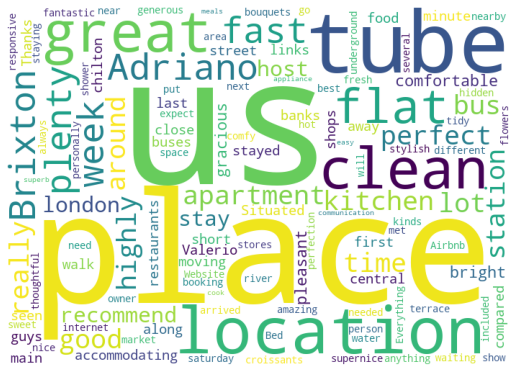

In [ ]:
text = temp['comments'].values
text = str(text)
stopwords = set(STOPWORDS)
name_wc = WordCloud(width = 700, height = 500, stopwords=stopwords, background_color="white").generate(text)
plt.figure(figsize = (8, 5), facecolor = None) 
plt.imshow(name_wc)

plt.axis("off") 
plt.tight_layout(pad = 0)
plt.savefig('nameWordCloud.png', bbox_inches = 'tight', pad_inches = 0.1)

##### 1.6.1.2 **Approach 2: Topic Modeling**

Using Latent Dirichlet Allocation (LDA), we are going to about 10 frequently-discussed topics from guests' reviews. This visualization step helps us to better understand how people's comments of Airbnb housing are clustering on certain topics.

In [ ]:
%%capture
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]

In [ ]:
data = temp.comments.values.tolist()
data_words = list(sent_to_words(data))
# remove stop words
data_words = remove_stopwords(data_words)

In [ ]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

In [ ]:
from pprint import pprint
# number of topics
num_topics = 10
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.012*"us" + 0.012*"room" + 0.012*"great" + 0.010*"house" + '
  '0.010*"apartment" + 0.010*"clean" + 0.009*"stay" + 0.008*"nice" + '
  '0.008*"place" + 0.008*"really"'),
 (1,
  '0.023*"de" + 0.021*"et" + 0.019*"la" + 0.017*"tres" + 0.013*"le" + '
  '0.012*"est" + 0.011*"un" + 0.010*"nous" + 0.008*"bien" + 0.007*"pour"'),
 (2,
  '0.012*"und" + 0.010*"really" + 0.010*"us" + 0.009*"great" + 0.008*"stay" + '
  '0.008*"room" + 0.008*"nice" + 0.007*"time" + 0.007*"host" + '
  '0.006*"location"'),
 (3,
  '0.023*"stay" + 0.022*"great" + 0.020*"place" + 0.013*"room" + '
  '0.012*"location" + 0.010*"lovely" + 0.009*"would" + 0.008*"boat" + '
  '0.008*"us" + 0.008*"host"'),
 (4,
  '0.013*"place" + 0.013*"clean" + 0.012*"stay" + 0.012*"apartment" + '
  '0.009*"room" + 0.008*"host" + 0.008*"flat" + 0.007*"time" + '
  '0.007*"recommend" + 0.007*"lovely"'),
 (5,
  '0.017*"simon" + 0.014*"great" + 0.013*"apartment" + 0.012*"de" + '
  '0.011*"stay" + 0.010*"us" + 0.009*"room" + 0.007*"location"

**Visualize the result of Topic Modeling: An Interactive Graph**

In [ ]:
import pyLDAvis.gensim_models
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary=lda_model.id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.078511 -0.034708       1        1  25.538661
0      0.063830 -0.028466       2        1  17.099971
7      0.038835 -0.030439       3        1  13.131388
8      0.075786 -0.010605       4        1  11.088782
1     -0.264524  0.000932       5        1   7.955859
6      0.048983 -0.003444       6        1   7.695363
4     -0.001508  0.018775       7        1   5.811820
2      0.040481  0.127783       8        1   4.750062
5     -0.050322 -0.029663       9        1   4.396840
9     -0.030069 -0.010163      10        1   2.531255, topic_info=            Term         Freq        Total Category  logprob  loglift
703           de  1038.000000  1038.000000  Default  30.0000  30.0000
767           et   771.000000   771.000000  Default  29.0000  29.0000
718           la   747.000000   747.000000  Default  28.0000  28.0000
651         tres   593.000000   593.000000  Default  27.0000  27.0000
34         great  4801.000000  4801.000000  Default  26.0000  26.0000
..           ...          ...          ...      ...      ...      ...
25            us    33.751288  2293.413193  Topic10  -5.5145  -0.5423
62      location    33.300466  3063.044910  Topic10  -5.5280  -0.8451
209   definitely    29.429112  1175.087476  Topic10  -5.6516  -0.0107
9    comfortable    30.074160  2256.451484  Topic10  -5.6299  -0.6414
26          walk    29.438170  1475.281402  Topic10  -5.6513  -0.2379

[844 rows x 6 columns], token_table=       Topic      Freq        Term
term                              
2432       5  0.874155     abbiamo
2432       8  0.092016     abbiamo
195        1  0.377104  absolutely
195        2  0.143241  absolutely
195        3  0.026310  absolutely
...      ...       ...         ...
20903     10  0.502532          나무
20904     10  0.502532         단점은
20905     10  0.502532         단점을
20906     10  0.502532        더운물을
20907     10  0.502532        데울려면

[2727 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 1, 8, 9, 2, 7, 5, 3, 6, 10])

As shown above, the majority of topics extracted from guests' reviews are placed in quadrant 4, which is not a very ideal situation (we hoped to obtain topic bubbles scattered in four different quadrants). Nonetheless, such clustering is still useful, because it shows that different guests tend to mention similar things in their comments on Airbnb housings:

Common words across various topics such as "clean", "comfortable", and "helpful" show that guests frequently talk about the tidiness of housing and hospitality of hosts in their reviews.

# **2. Exploratory data analysis**
#### Before putting all the collected statistics into model training, we want to obtain a deeper and more thorough understanding of each dataset.

Since ***listings*** is the dataset that contains the largest number of columns, it's reasonable to say that processing this dataset would be most strenuous. Thus, our EDA starts with us handling the *listings* dataset.

In [ ]:
listings.head(2)

,id,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,host_id,host_since,host_location,host_about,host_response_time,host_response_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,city,state,zipcode,market,smart_location,country,latitude,longitude,property_type,room_type,accommodates,bathrooms,...,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,11551,Arty and Bright London Apartment in Zone 2,Unlike most rental apartments out there my fla...,"Amenities Bedding: 1 Double bed, 1 living room...",Unlike most rental apartments out there my fla...,family,Not even 10 minutes by metro from Victoria Sta...,No Smoking (very strict) Check-in time is afte...,Tons of buses (24hrs) go into central London f...,Guest will have access to the entire apartment,No interaction with guests as you book the ent...,No Smoking (very strict) No pets are allowed i...,43039,2009-10-03,"London, England, United Kingdom","Hello, I'm a friendly Italian man with a very ...",within an hour,100.0,t,Brixton,3.0,3.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,"London, United Kingdom",Brixton,Lambeth,London,NaN,SW9 8DG,London,"London, United Kingdom",United Kingdom,51.46225,-0.11732,Apartment,Entire home/apt,4,1.0,...,2,$20.00,3,180,3,3,180,180,3.0,180.0,4 days ago,17,41,61,336,2019-11-06,185,2,2010-03-21,2019-09-15,92.0,9.0,9.0,10.0,10.0,9.0,9.0,f,NaN,NaN,t,f,strict_14_with_grace_period,f,t,2,2,0,0,1.58
1,38151,Double room/ lounge,NaN,"Comfortable, large double room /lounge area av...","Comfortable, large double room /lounge area av...",none,NaN,NaN,NaN,NaN,NaN,NaN,163634,2010-07-11,GB,NaN,NaN,0.0,f,Crystal Palace,1.0,1.0,['phone'],f,f,"Upper Norwood, Surrey, United Kingdom",LB of Croydon,Croydon,Upper Norwood,Surrey,SE19 3EJ,London,"Upper Norwood, United Kingdom",United Kingdom,51.41940,-0.08722,Apartment,Private room,2,NaN,...,1,$0.00,1,730,1,1,730,730,1.0,730.0,never,30,60,90,365,2019-11-06,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,f,f,flexible,f,f,1,0,1,0,NaN


In [ ]:
# test if there is any room that does not any guest review
print("Total number of room/house recorded in the listings dataset:", listings.shape[0])
print("Making sure every room/house in listings is distinct:")
print("     Number of duplicated records for the same house:", listings['id'].duplicated().sum())
print("Making sure the zeros in 'number_of_reviews' match with zeros in 'reviews_per_month':\n     Number of room/house that has NaN in 'review per month' column:", listings[listings['reviews_per_month'].isnull()].shape[0])
print("     Number of room/house that has zero guest review:", listings[listings['number_of_reviews']==0].shape[0])

Total number of room/house recorded in the listings dataset: 85065
Making sure every room/house in listings is distinct:
     Number of duplicated records for the same house: 0
Making sure the zeros in 'number_of_reviews' match with zeros in 'reviews_per_month':
     Number of room/house that has NaN in 'review per month' column: 20004
     Number of room/house that has zero guest review: 20004


### 2.1 **Property Types**
#### Goal: Visualize the distribution of property types
##### Since there are many types of Airbnb housing, such as a single room, a whole house, and even a boat, we are curious to see the specific distribution of various housing types.

In [ ]:
listings['property_type'] = pd.Categorical(listings.property_type)

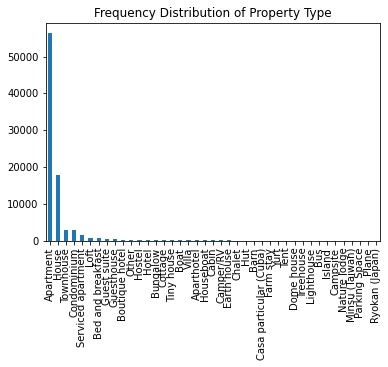

In [ ]:
listings['property_type'].value_counts().plot(kind='bar', title = 'Frequency Distribution of Property Type')

From the plot above, we can see that the number of housing marked as 'apartment' is much larger than other types of housing.

### 2.2 **Room Types**
#### Goal: Visualize the distribution of Room Types

In [ ]:
listings["room_type"].value_counts()

Entire home/apt    47444
Private room       35880
Hotel room          1113
Shared room          628
Name: room_type, dtype: int64

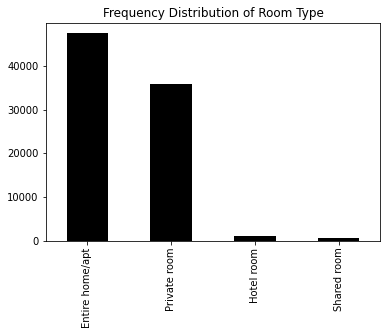

In [ ]:
listings['room_type'].value_counts().plot(kind='bar', color = 'black', title = 'Frequency Distribution of Room Type')

### 2.3 **Experiences Offered**
#### Goal: Visualize the distribution of "experiences offered"

In [ ]:
listings['experiences_offered'] = pd.Categorical(listings.experiences_offered)
listings['experiences_offered'].dtypes

CategoricalDtype(categories=['business', 'family', 'none', 'romantic', 'social'], ordered=False)

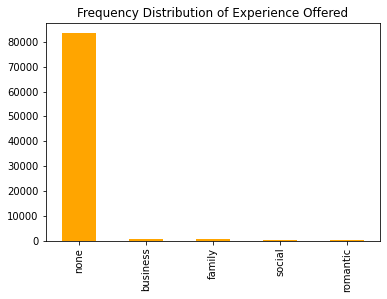

In [ ]:
listings['experiences_offered'].value_counts().plot(kind='bar', color = 'orange', title = 'Frequency Distribution of Experience Offered')

Since many housings do not specify the experience that will be offered (having "none" in their 'experiences_offered' column), we want to exclude them from the plot and see the distribution of the other four valid types (business, family, social, or romantic).

In [ ]:
listings_1 = listings[listings['experiences_offered']!='none']

In [ ]:
# temporarily convert the column type back to object, and change the type to category again, so that the plot won't contain the 'none' category
listings_1['experiences_offered'] = listings_1['experiences_offered'].astype(object)
listings_1['experiences_offered'] = listings_1['experiences_offered'].astype('category')

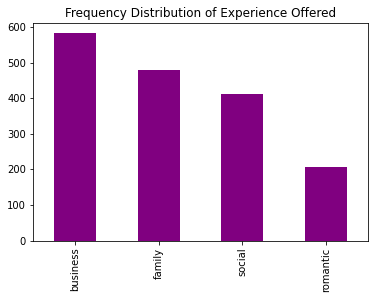

In [ ]:
listings_1['experiences_offered'].value_counts().plot(kind='bar', color = 'purple', title ='Frequency Distribution of Experience Offered')

### 2.4 **Neighbourhoods**
#### Visualize the distribution of neighbourhoods

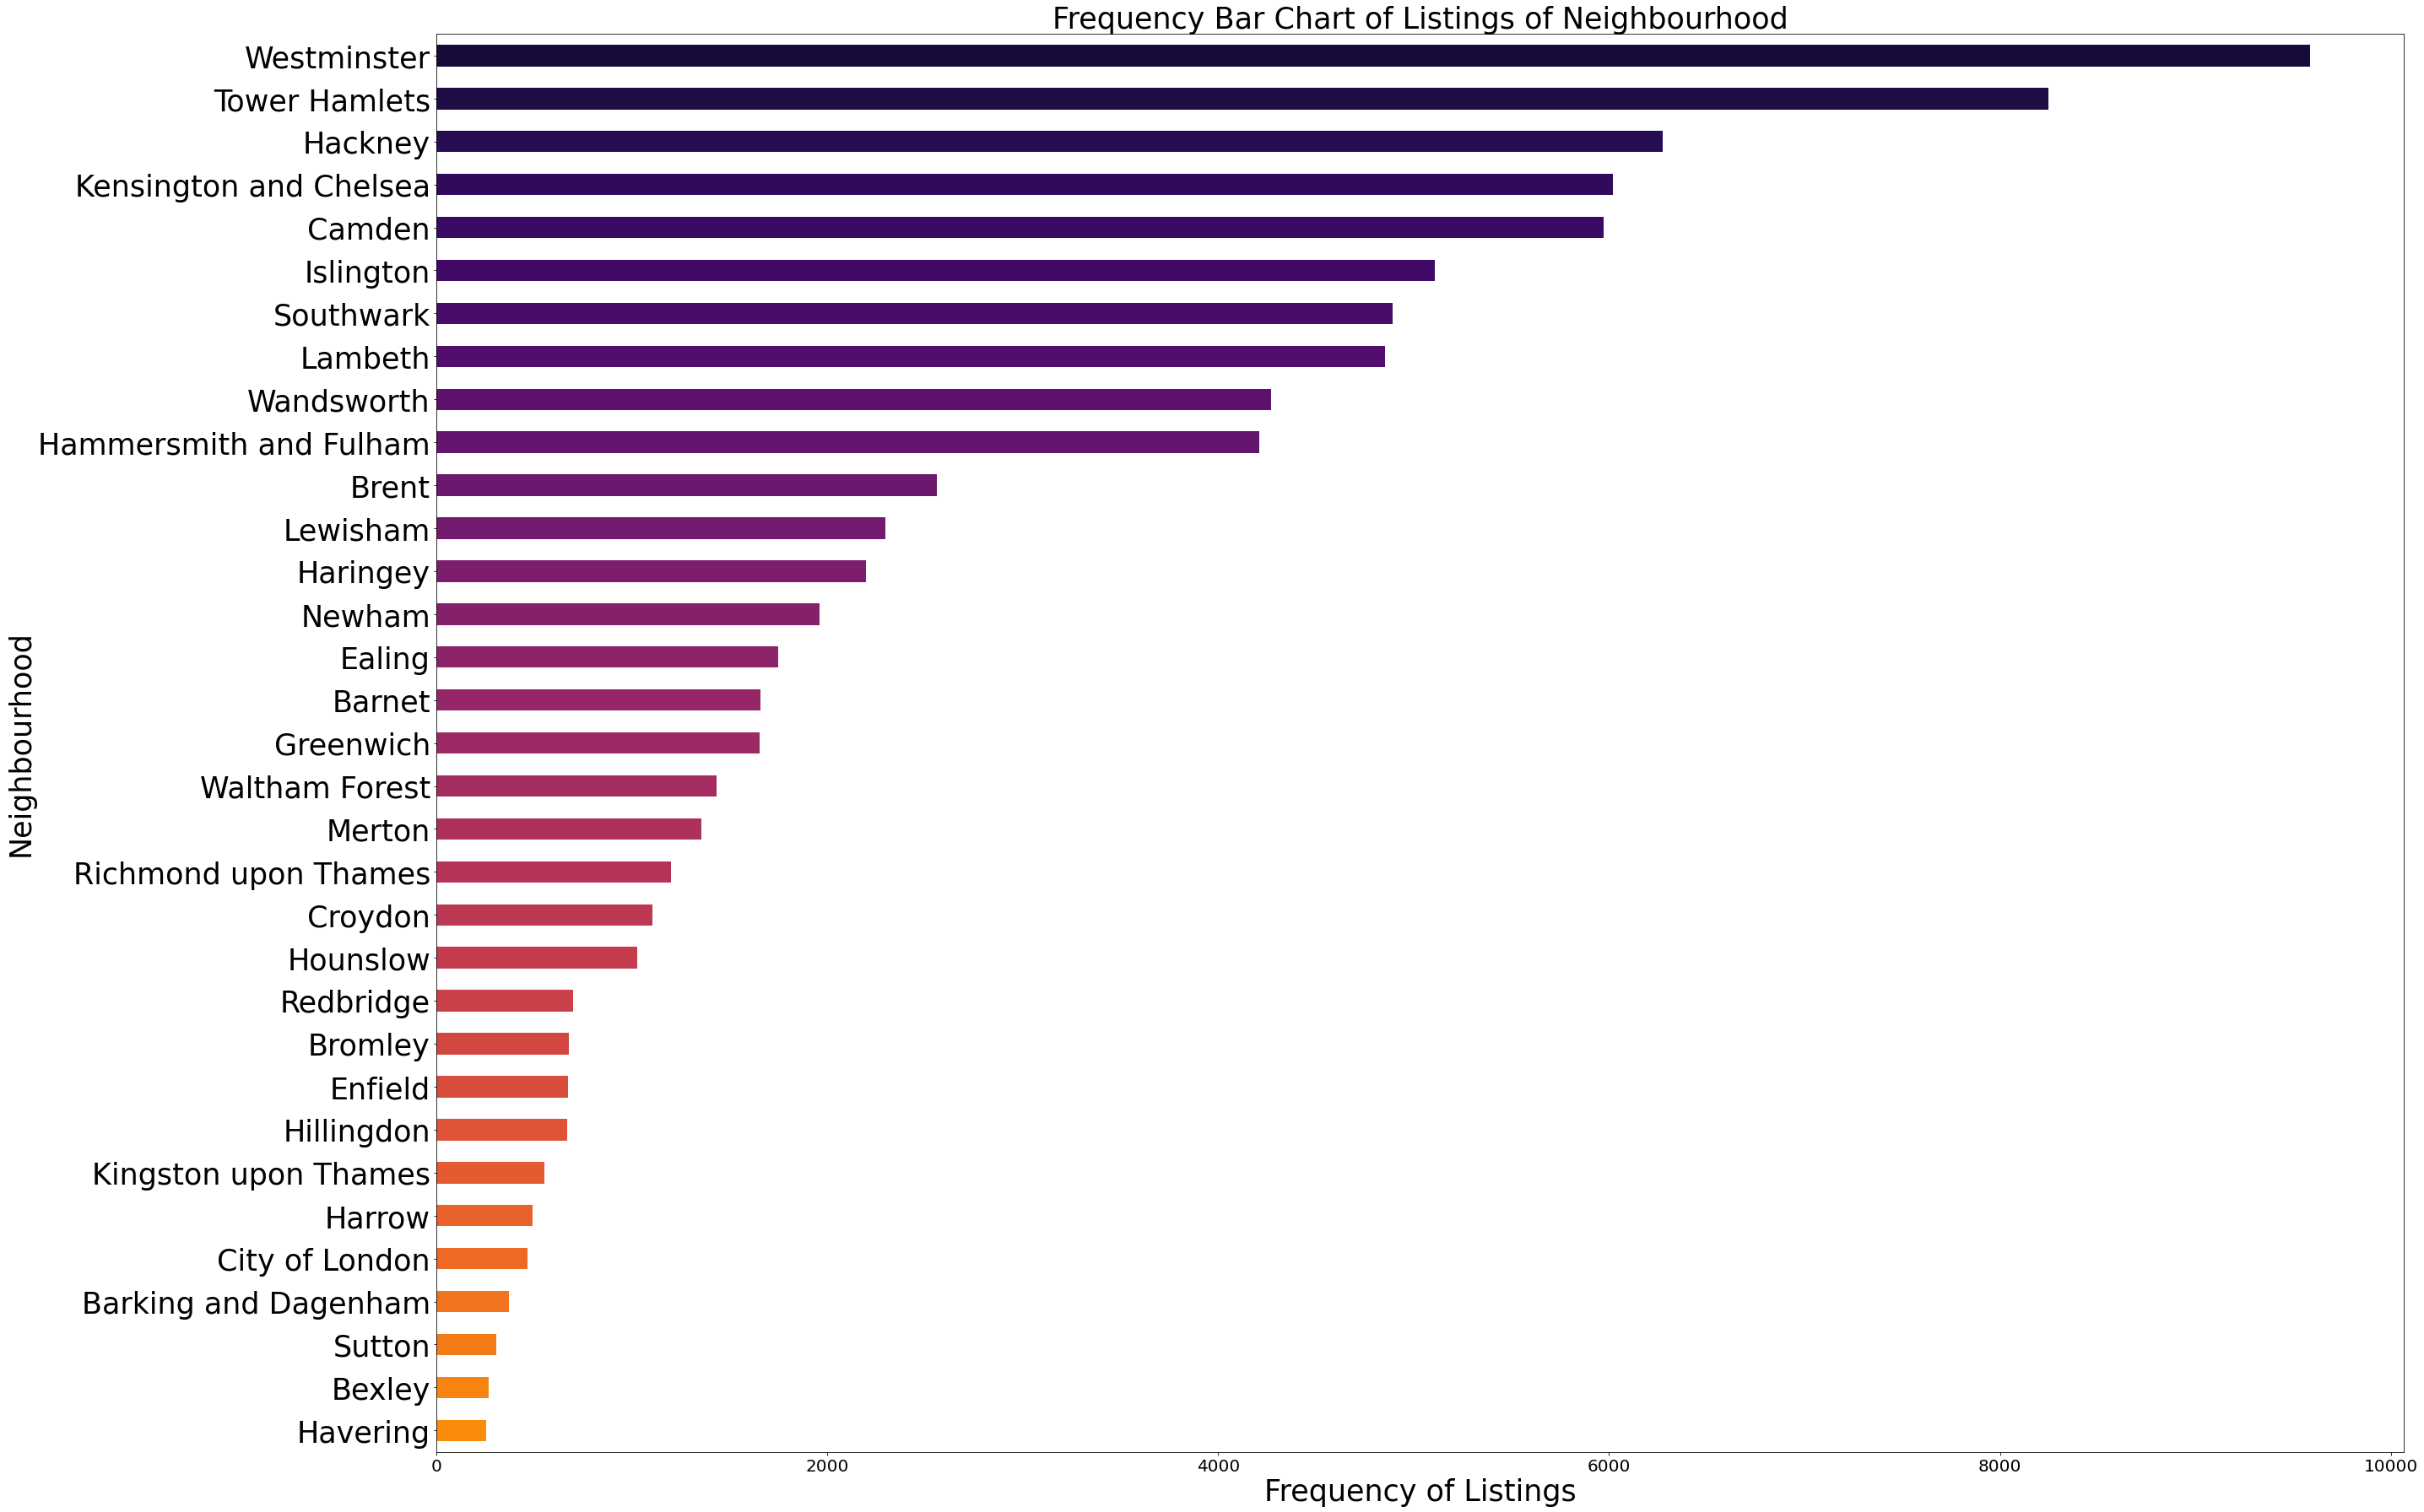

In [ ]:
import matplotlib as mpl
from matplotlib import colors as mcolors
color = mpl.cm.inferno_r(np.linspace(.25, .9, len(listings["neighbourhood_cleansed"].unique())))
listings["neighbourhood_cleansed"].value_counts(ascending=True).plot.barh(color = color, figsize = (40, 25))
plt.tick_params(axis="y", labelsize=35)
plt.tick_params(axis='x', labelsize=20)
plt.title('Frequency Bar Chart of Listings of Neighbourhood', fontsize = 35)
plt.ylabel('Neighbourhood', fontsize = 35)
plt.xlabel('Frequency of Listings', fontsize = 35)
plt.tight_layout()

### 2.5 **Other Categorical Information**

In [ ]:
listings['host_identity_verified'].value_counts()

f    54596
t    30457
Name: host_identity_verified, dtype: int64

In [ ]:
listings['host_is_superhost'].value_counts()

f    72300
t    12753
Name: host_is_superhost, dtype: int64

In [ ]:
listings['host_has_profile_pic'].value_counts()

t    84795
f      258
Name: host_has_profile_pic, dtype: int64

In [ ]:
listings['room_type'].value_counts()

Entire home/apt    47444
Private room       35880
Hotel room          1113
Shared room          628
Name: room_type, dtype: int64

In [ ]:
listings['host_response_time'].value_counts()

within an hour        37451
within a few hours    12170
within a day           7867
a few days or more     1680
Name: host_response_time, dtype: int64

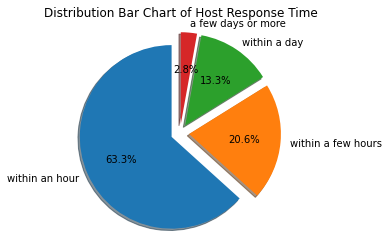

In [ ]:
labels = ['within an hour', 'within a few hours', 'within a day', 'a few days or more']
sizes = [37451, 12170, 7867, 1680]
explode = (0.1, 0.1, 0.1, 0.1)  
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal') 
plt.title("Distribution Bar Chart of Host Response Time")
plt.show()

In [ ]:
listings['instant_bookable'].value_counts()

f    48196
t    36869
Name: instant_bookable, dtype: int64

In [ ]:
listings['is_business_travel_ready'].value_counts()

f    85065
Name: is_business_travel_ready, dtype: int64

The result above suggests that every housing is recorded as "not business/travel ready". Thus this column of information is not very helpful for distinguishing different housings. We decide to drop this column.

In [ ]:
listings = listings.drop(columns='is_business_travel_ready')

In [ ]:
listings['cancellation_policy'].value_counts()

strict_14_with_grace_period    36763
flexible                       27291
moderate                       20022
super_strict_60                  574
super_strict_30                  376
luxury_moderate                   27
strict                             8
luxury_super_strict_95             4
Name: cancellation_policy, dtype: int64

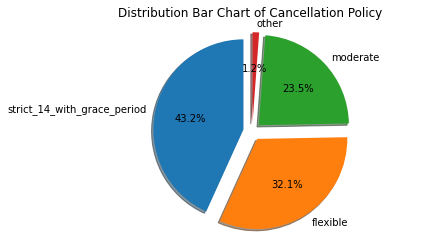

In [ ]:
labels = ['strict_14_with_grace_period', 'flexible', 'moderate', 'other']
sizes = [36763, 27291, 20022, (574+376+27+8+4)]
explode = (0.1, 0.1, 0.1, 0.1)  
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal') 
plt.title("Distribution Bar Chart of Cancellation Policy")
plt.show()

### 2.6 **Sentiment Analysis on Reviews**

In [ ]:
%%capture
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
analyzer = SentimentIntensityAnalyzer()
def sentiment_scores(sentence):
    snt = analyzer.polarity_scores(sentence)
    print("{:-<40}\n{}".format(sentence, str(snt)))

In [ ]:
# Example
sentiment_scores(reviews.iloc[0]["comments"])

The flat was bright, comfortable and clean and Adriano was pleasant and gracious about accommodating us at the last minute. The Brixton tube was a very short walk away and there were plenty of buses. There are lots of fast food restaurants, banks, and shops along the main street.
{'neg': 0.0, 'neu': 0.731, 'pos': 0.269, 'compound': 0.9413}


In [ ]:
score_dictionary_sample = analyzer.polarity_scores(reviews.iloc[0]["comments"])
score_dictionary_sample['compound']
reviews['review_score'] = ''
reviews = reviews.reset_index(drop=True)

In [ ]:
reviews['review_score'] = reviews['comments'].apply(lambda x: analyzer.polarity_scores(x)['compound'])

In [ ]:
print("Total number of reviews: ", reviews.shape[0])
print("Number of reviews that have a positive sentiment score (sentiment analysis value > 0): ", reviews[reviews['review_score']>0].shape[0])
print("Number of reviews that have a negative sentiment score (sentiment analysis value < 0): ", reviews[reviews['review_score']<0].shape[0])

Total number of reviews:  1485614
Number of reviews that have a positive sentiment score (sentiment analysis value > 0):  1277581
Number of reviews that have a negative sentiment score (sentiment analysis value < 0):  65912


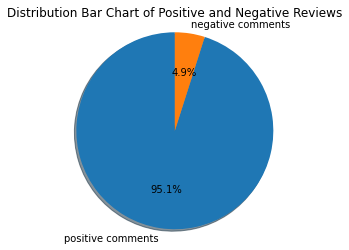

In [ ]:
labels = ['positive comments', 'negative comments']
sizes = [1277581, 65912]
explode = (0, 0)  
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal') 
plt.title("Distribution Bar Chart of Positive and Negative Reviews")
plt.show()

In [ ]:
score = reviews[['listing_id','review_score']]
score = score.groupby('listing_id',as_index=False).mean()

### 2.7 **Sentiment Analysis on Housings' Names and Descriptions**

In [ ]:
listings['name'].isnull().sum()
listings['name'] = listings['name'].fillna(' ')

listings['description'].isnull().sum()
listings['description'] = listings['description'].str.replace('\r',' ')
listings['description'] = listings['description'].str.replace('\n',' ')
listings['description'] = listings['description'].fillna(' ')

In [ ]:
# example
sentiment_scores(listings.iloc[0]["name"])
sentiment_scores(listings.iloc[0]["description"])

Arty and Bright London Apartment in Zone 2
{'neg': 0.0, 'neu': 0.674, 'pos': 0.326, 'compound': 0.4404}
Unlike most rental apartments out there my flat gives you straight away home feel mainly due to the oil paintings from my own collection, something you rarely find in 5* hotels, let alone budget accommodation! A very well equipped kitchen and a large bathroom, not to mention very fast 250 Mbps Wi-Fi and a 40 inch smart TV.  Very close to shops 24hrs and supermarkets providing easy reach to daily essential...not to mention just a 3-minute walk to the fastest (Victoria Line) underground in London. Amenities Bedding: 1 Double bed, 1 living room with 1 chair that unfolds into a comfortable bed and 1 sofa bed for two, 1 bathroom, 1 kitchen Utilities: Central heating, Wi-fi, 40inch smart TV, Kettle, Toaster, Iron board, Cooker, Fridge, Freezer, Washing machine, crockery, pots, pans, dishes etc.  Bed linen is provided along with fresh towels. Guest will have access to the entire apartment N

In [ ]:
listings['name_score'] = ''
listings['description_score'] = ''
listings = listings.reset_index(drop=True)
listings['name_score'] = listings['name'].apply(lambda x: analyzer.polarity_scores(x)['compound'])
listings['description_score'] = listings['description'].apply(lambda x: analyzer.polarity_scores(x)['compound'])

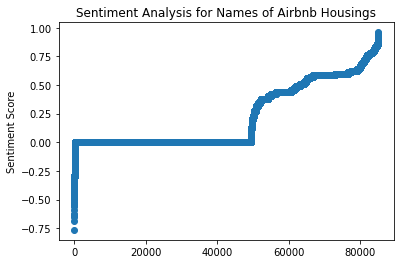

In [ ]:
sort_1 = listings[['name_score']].sort_values(by='name_score')
sort_1 = sort_1.reset_index(drop=True)
sort_1['index'] = ''
i = 0
for i in range(sort_1.shape[0]):
  sort_1['index'][i] = i
  i += 1
frame1 = plt.gca()
plt.scatter(x = sort_1['index'], y = sort_1['name_score'])
plt.title('Sentiment Analysis for Names of Airbnb Housings')
plt.xlabel('')
plt.ylabel('Sentiment Score')
#frame1.axes.get_xaxis().set_visible(False)
plt.show()

As shown above, there's a long straight line, indicating that a majority of housings' names are caregorized as emotionally-neutral. It's important to keep in mind that we have fill the missing values in names with an empty string, which will definitely receive a zero value (equivalent to 'emotionally neutral') in Sentiment Analysis.

Besides the long straight line, we can see that only a small number of names are categorized as emotionally negative (having a negative sentiment value), while about 30,000 housings' names are emotionally positive. This result in is line with our expectation because hosts are likely to use positive words to name their housings, so that people are more attracted to book them.

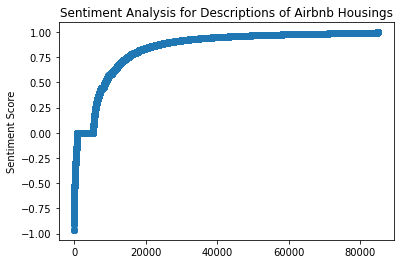

In [ ]:
sort_2 = listings[['description_score']].sort_values(by='description_score')
sort_2 = sort_2.reset_index(drop=True)
sort_2['index'] = ''
i = 0
for i in range(sort_2.shape[0]):
  sort_2['index'][i] = i
  i += 1
frame2  = plt.gca()
plt.scatter(x=sort_2['index'], y=sort_2['description_score'])
plt.title('Sentiment Analysis for Descriptions of Airbnb Housings')
plt.xlabel('')
plt.ylabel('Sentiment Score')
plt.show()

As shown by the plot, only a few housings' descriptions are categorized as emotionally negative. 

About 80,000 housings (make up about 94% of our whole dataset) have positive descriptions. This is in accordance with common sense, becasue hosts are likely to use complimentary words to introduce their housings, so that guests will be convinced to spend a few nights there.

### 2.8 **Merge *reviews*, *calendar* and *listings* file**

In [ ]:
temp = calendar[['listing_id','price']]
listings.rename(columns = {'id' : 'listing_id'}, inplace = True)

In [ ]:
calendar_new = temp.groupby('listing_id', as_index=False).mean()

Reasoning for dropping certain columns in Listings: 

"Summary": Often times, the content of "description" is the same as that of "summary"，or the situation is that summary=NaN whereas "description" has valid content. Thus, we choose to keep "description" column and discard "summary" column.

"Experinces_offered": Although this column could have been a great categorical feature, it contains too many null values (0ver 98%). The same reason also applies to the following columns: access, interaction，notes, house_rules, host_since, host_location, square_feet.

"Neighbourhood_overview": Applying common sense (hosts are likely to positively describe their houses and neighbourhoods to attract guests), we believe this column's content isn't objective enough to be incorporated in our model). We decide to use external information such as maps that reflect crime rate in each neighborhood as substitute for this column.

In [ ]:
temp2 = listings.copy()[['listing_id','name_score','description_score','host_response_rate','host_response_time','host_has_profile_pic','host_identity_verified','neighbourhood_cleansed','host_is_superhost','latitude','longitude','property_type','room_type','accommodates','bedrooms','bathrooms','beds','minimum_nights','number_of_reviews','review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value','instant_bookable','cancellation_policy']]

In [ ]:
df_1 = pd.merge(temp2, calendar_new, how='left', on='listing_id')
df_final = pd.merge(df_1, score, how='outer', on='listing_id')
df_final['review_score'] = df_final['review_score'].fillna(0)

### 2.9 **Continuous Information**
> This section is to inspect continuous variables like housings' physical features (e.g., the number of bedrooms, the number of bathrooms, minimum of bookable nights), and score-related values (e.g., guests' scores on housings' cleanliness and hosts' hospitality).

In [ ]:
df_final[["accommodates","bedrooms","bathrooms","beds","minimum_nights","number_of_reviews","review_scores_rating","review_scores_accuracy","review_scores_cleanliness","review_scores_checkin", "review_scores_communication", "review_scores_location","review_scores_value","price","review_score"]].describe()

,accommodates,bedrooms,bathrooms,beds,minimum_nights,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,price,review_score
count,85068.000000,84979.000000,84947.000000,84919.000000,85068.000000,85068.000000,63446.000000,63393.000000,63407.000000,63345.000000,63401.000000,63347.000000,63346.000000,85068.000000,85068.000000
mean,3.211995,1.416821,1.306838,1.756026,4.148105,17.471152,92.546654,9.504251,9.269150,9.623680,9.649154,9.538289,9.267057,125.931339,0.516279
std,2.032946,0.919024,0.611545,1.280808,16.681720,36.789578,10.202935,0.990021,1.136704,0.901635,0.900786,0.820674,1.041420,203.356665,0.363756
min,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,7.000000,-0.996400
25%,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,90.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,46.424658,0.000000
50%,2.000000,1.000000,1.000000,1.000000,2.000000,4.000000,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,84.741096,0.650792
75%,4.000000,2.000000,1.500000,2.000000,3.000000,17.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,145.480137,0.811384
max,40.000000,22.000000,17.000000,29.000000,1125.000000,716.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,12345.000000,0.999000


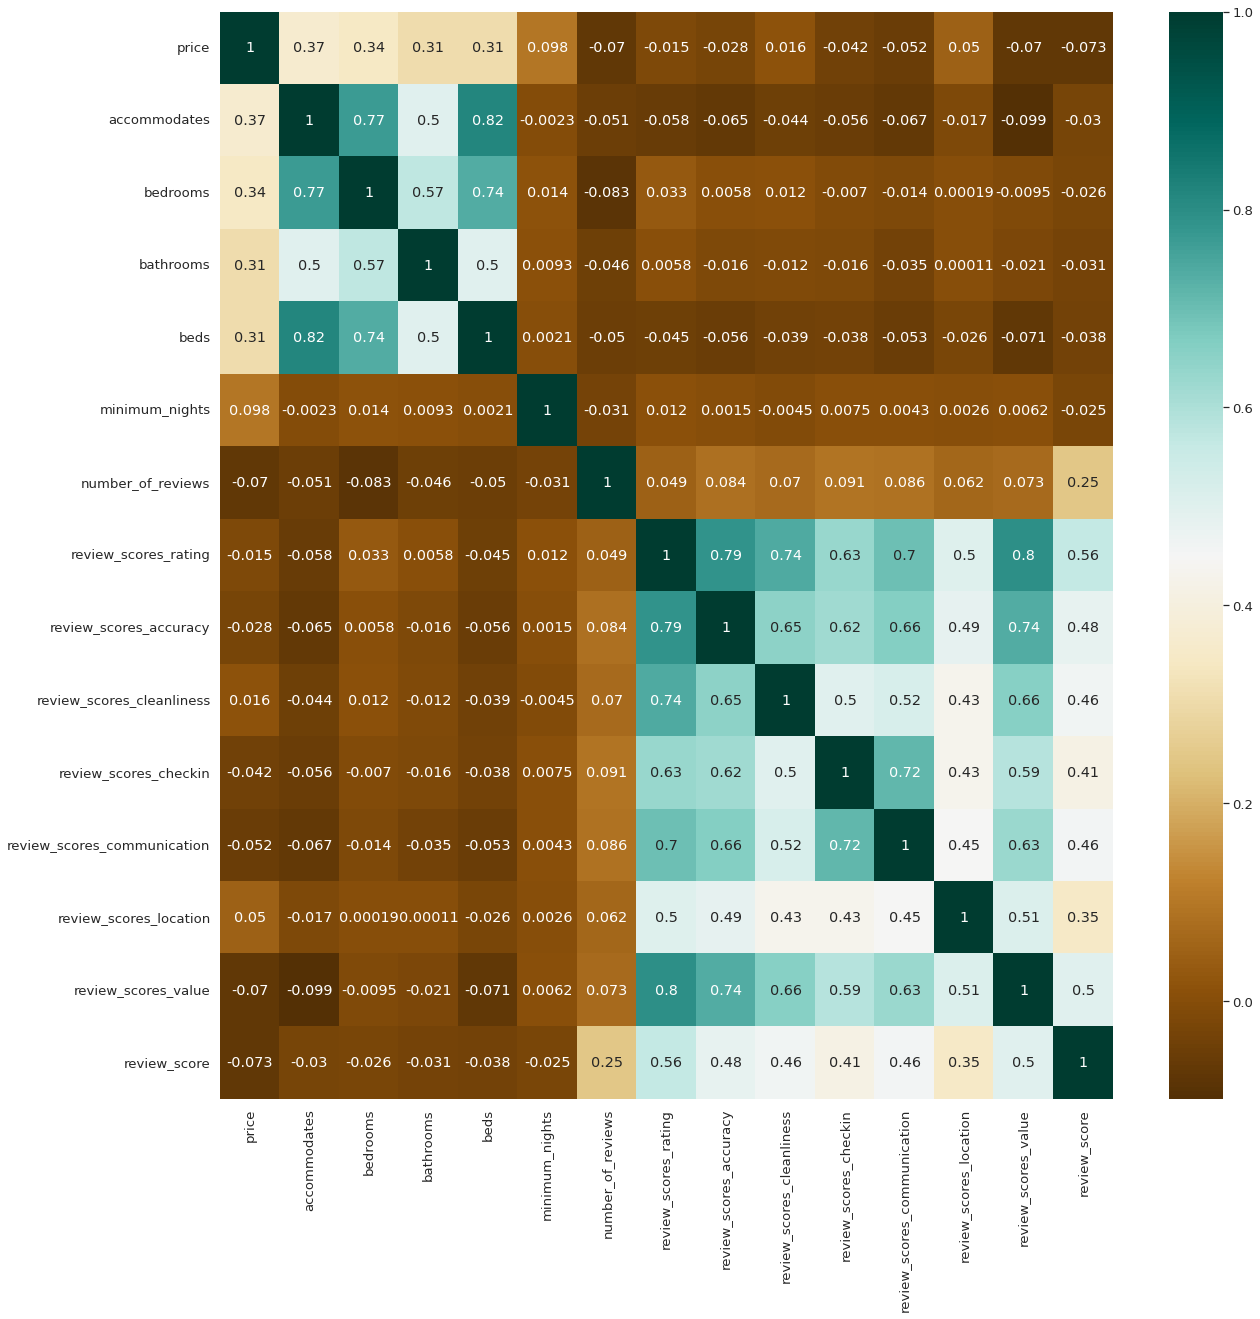

In [ ]:
# correlation inspection
sns.set(font_scale=1.2)
fig, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(df_final[["price","accommodates","bedrooms","bathrooms","beds","minimum_nights",
                      "number_of_reviews","review_scores_rating",
                      "review_scores_accuracy","review_scores_cleanliness","review_scores_checkin", 
                      "review_scores_communication", "review_scores_location","review_scores_value",
                      "review_score"]].corr(),cmap="BrBG",annot=True)
plt.savefig('Matrix.png', bbox_inches = 'tight', pad_inches = 0.1)

As shown above, the columns that make up guests' overall ratings for housings (e.g., review_scores_location, review_scores_communication) are highly correlated with each other. In order to ensure features are independent of each other, we decide to solely use review_scores_rating column to represent housings' guest review scores.

In [ ]:
df_final = df_final[['name_score', 'description_score', 'host_response_rate',
       'host_response_time', 'host_has_profile_pic', 'host_identity_verified',
       'neighbourhood_cleansed', 'host_is_superhost', 'latitude', 'longitude',
       'property_type', 'room_type', 'accommodates', 'bedrooms', 'bathrooms',
       'beds', 'minimum_nights', 'number_of_reviews', 'review_scores_rating',
       'instant_bookable', 'cancellation_policy', 'price',
       'review_score']]
# drop the last row because from manual inspection, we notice that it contains too many nulls
df_final = df_final[0:85065]

Remove outliers by price
> We notice that some housings have an absurding high price (more than 12,000 dollars per night)
From closer inspection on that housing's other attributes (e.g., location, number of people it can accommodate), 
and the specific price ($123,45.00), we believe that it's a false record. Thus, we decide to remove it

In [ ]:
df_final = df_final.drop([66272]).reset_index(drop=True)

In [ ]:
# find the rows that contains a lot null values
a = df_final.isnull().sum(axis=1)
a.sort_values(ascending=True)

0        0
50240    0
50241    0
50242    0
50243    0
        ..
11173    5
9152     5
7323     5
10098    5
21583    5
Length: 85064, dtype: int64

From the above cell, we can see that rows with null at most have 5 missing values, whereas we have in total 25 columns.

A rule-of-thumb for deleting rows is "we delete a particular row if it has a null value for a particular feature and a particular column if it has more than 70-75% of missing values". Therefore, in our case, we do not need to drop any row. Instead, we can simply fill the NaN with mean or zero, which we will address in later section.

# **3. Features**
#### After we have our dataset cleaned, we want to add features with our common sense, domain-knowledge and understanding of the business model. It might be helpful for the model.


## 3.1 **Features Engineering**

Task 1: Deal with Null values

Before we put the dataset into model training, we want to ensure the null values under various columns are properly handled. 

Leaving the nulls unattended might work for some classifiers, but since we are using linear regression, we have to either drop the entries containing nulls or assign values to them.

In [ ]:
df_final.isnull().sum()

name_score                    0
description_score             0
host_response_rate            0
host_response_time        25899
host_has_profile_pic         12
host_identity_verified       12
neighbourhood_cleansed        0
host_is_superhost            12
latitude                      0
longitude                     0
property_type                 0
room_type                     0
accommodates                  0
bedrooms                     89
bathrooms                   121
beds                        149
minimum_nights                0
number_of_reviews             0
review_scores_rating      21618
instant_bookable              0
cancellation_policy           0
price                         0
review_score                  0
dtype: int64

As shown above, the columns that contain at least one null value are 'host_response_time', 'host_has_profile_pic', 'host_identity_verified', 'host_is_super_host', 'bedrooms', 'bathrooms', 'beds', 'review_scores_rating'. We will manually fill in the blanks in the following code.

In [ ]:
# for categorical columns, assign "f" (false) to the column if the value is initially NaN
df_final['host_has_profile_pic'] = df_final['host_has_profile_pic'].fillna('f')
df_final['host_identity_verified'] = df_final['host_identity_verified'].fillna('f')
df_final['host_is_superhost'] = df_final['host_is_superhost'].fillna('f')

In [ ]:
# A Special Case:'host_response_time'
df_final[df_final['host_response_time'].isnull()]['host_response_rate']

1        0.0
5        0.0
8        0.0
16       0.0
23       0.0
        ... 
85048    0.0
85049    0.0
85052    0.0
85055    0.0
85058    0.0
Name: host_response_rate, Length: 25899, dtype: float64

As shown above, we can see that if a row has NaN in its 'host_response_time' column, it must have "0.0" in its 'host_response_rate' column. Therefore, we decide to create a new category 'never' to reflect that certain hosts never reply to their guests.

In [ ]:
df_final['host_response_time'] = df_final['host_response_time'].fillna('never')

For continuous values, the process of filling null values is a little bit more complicated.

**Value imputation:**

'Beds': 

It's not very possible that an Airbnb housing does not have a bed, so we decide to fill NaN in 'beds' column with mean. df_final['beds'].mean() = 1.7, we choose to regard the mean as 1 bed instead of 2, becasuse from manual inspection, a lot of cases that have null value in 'beds' column are private rooms, and thus they're more likely to have only one bed.



In [ ]:
df_final['beds'] = df_final['beds'].fillna(1)

'Bedrooms':

df_final[df_final['bedrooms'].isnull()]['accommodates'].mean() = 2.6

We can see that housings that have null values in 'bedrooms' column can actually accommodate more than 2
people on average. Thus, it's not rational to assign 0 to the number of bedrooms.

df_final['bedrooms'].mean() = 1.4

Therefore, we decide to assign value 1 to housings that initially have NaN in their 'bedrooms' column

In [ ]:
df_final['bedrooms'] = df_final['bedrooms'].fillna(1)

'Bathrooms':

From manual inspection, we notice that when a housing has NaN in its 'bathrooms' column, it's most likely to be a private room. Therefore, we believe assigning zero to 'bathrooms' column would be most appropriate.

In [ ]:
df_final['bathrooms'] = df_final['bathrooms'].fillna(0)

'review_scores_rating':

From manual inspection, we notice that housings with NaN in their 'review_scores_rating' column always have zero in their 'number_of_reviews' column. We decide to use mean rating score to fill in the blanks.

In [ ]:
mean_rating = df_final['review_scores_rating'].mean()
df_final['review_scores_rating'] = df_final['review_scores_rating'].fillna(mean_rating)

# **4. Modeling**

In [ ]:
import sklearn
from scipy.stats import norm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

## 4.1 **Linear Regression**
To begin with, we want to try out the simplest method (linear regression) and test if it can generate a good prediction model.

In [ ]:
# use label encoder to transform categorical values into numeric values
labelencoder = LabelEncoder()
category_var = ['host_response_time', 'host_has_profile_pic', 'host_identity_verified', 
     'neighbourhood_cleansed', 'host_is_superhost', 'room_type', 'instant_bookable',
      'cancellation_policy','property_type']
for item in category_var:
  df_final[item] = labelencoder.fit_transform(df_final[item])

In [ ]:
X = df_final[df_final.loc[:, df_final.columns!='price'].columns]
Y = df_final['price']

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state = 1)

In [ ]:
lm = LinearRegression()
lm.fit(X_train, Y_train)

LinearRegression()

To find the optimal parameters for the linear function, we want to find weights that minimize the Root Mean Square Error (the standard deviation of the residuals)

In [ ]:
y_hat = lm.predict(X_train)
# compute MSE (mean squared error)
print("RMSE of training data = ", mean_squared_error(Y_train, y_hat)**0.5)

RMSE of training data =  180.00903997907784


In [ ]:
# take the testing data to the same process
y_hat_test = lm.predict(X_test)
print("RMSE of test set = ", mean_squared_error(Y_test,y_hat_test)**0.5)

RMSE of test set =  148.0640452259215


In [ ]:
r2_score(Y_test, y_hat_test)

0.2565003039093734

The root mean squared error is very large. This result is expected becasue in real-world situations, the relationship between complicated variables is rarely linear. 

We need to test out other methods.

## **4.2 Ridge Regressor**
Shrinks the weights a little:  Adds a regularization hyperparameter λ_2 multiplied by the (squared) L2 norm.

In [ ]:
RM = Ridge(alpha=1)
RM.fit(X_train, Y_train)

Ridge(alpha=1)

In [ ]:
y_hat_ridge = RM.predict(X_train)
y_hat_ridge_test = RM.predict(X_test)

In [ ]:
# compute RMSE (Root mean squared error)
print("RMSE of training set = ", mean_squared_error(Y_train, y_hat_ridge)**0.5)

RMSE of training set =  180.00904221985823


In [ ]:
# take the testing data to the same process
print("RMSE of test set = ", mean_squared_error(Y_test,y_hat_ridge_test)**0.5)

RMSE of test set =  148.06366011813301


In [ ]:
r2_score(Y_test,y_hat_ridge_test)

0.2565041715215395

The RMSE is still large. 

## **4.3 Elastic Net Regression**
Elastic Net combines the benefits of Lasso and Ridge

In [ ]:
# evaluate an elastic net model on the dataset
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold

enet_model = ElasticNet().fit(X_train, Y_train)
y_hat_elastic = enet_model.predict(X_train)
y_hat_elastic_test = enet_model.predict(X_test)

In [ ]:
# compute RMSE (Root mean squared error)
print("RMSE of training set = ", mean_squared_error(Y_train, y_hat_elastic)**0.5)

RMSE of training set =  182.0440651572029


In [ ]:
# take the testing data to the same process
print("RMSE of test set = ", mean_squared_error(Y_test,y_hat_elastic_test)**0.5)

RMSE of test set =  150.2527320261715


In [ ]:
r2_score(Y_test,y_hat_elastic_test)

0.23435697699762548

Unfortunately, Elastic Net Regression still produces a prediction model with a large RMSE.

## **4.4 Dimensionality Reduction Using PCA**
PCA: this technique comes in handy when we have high number of correlated features.

Correlation Heatmap

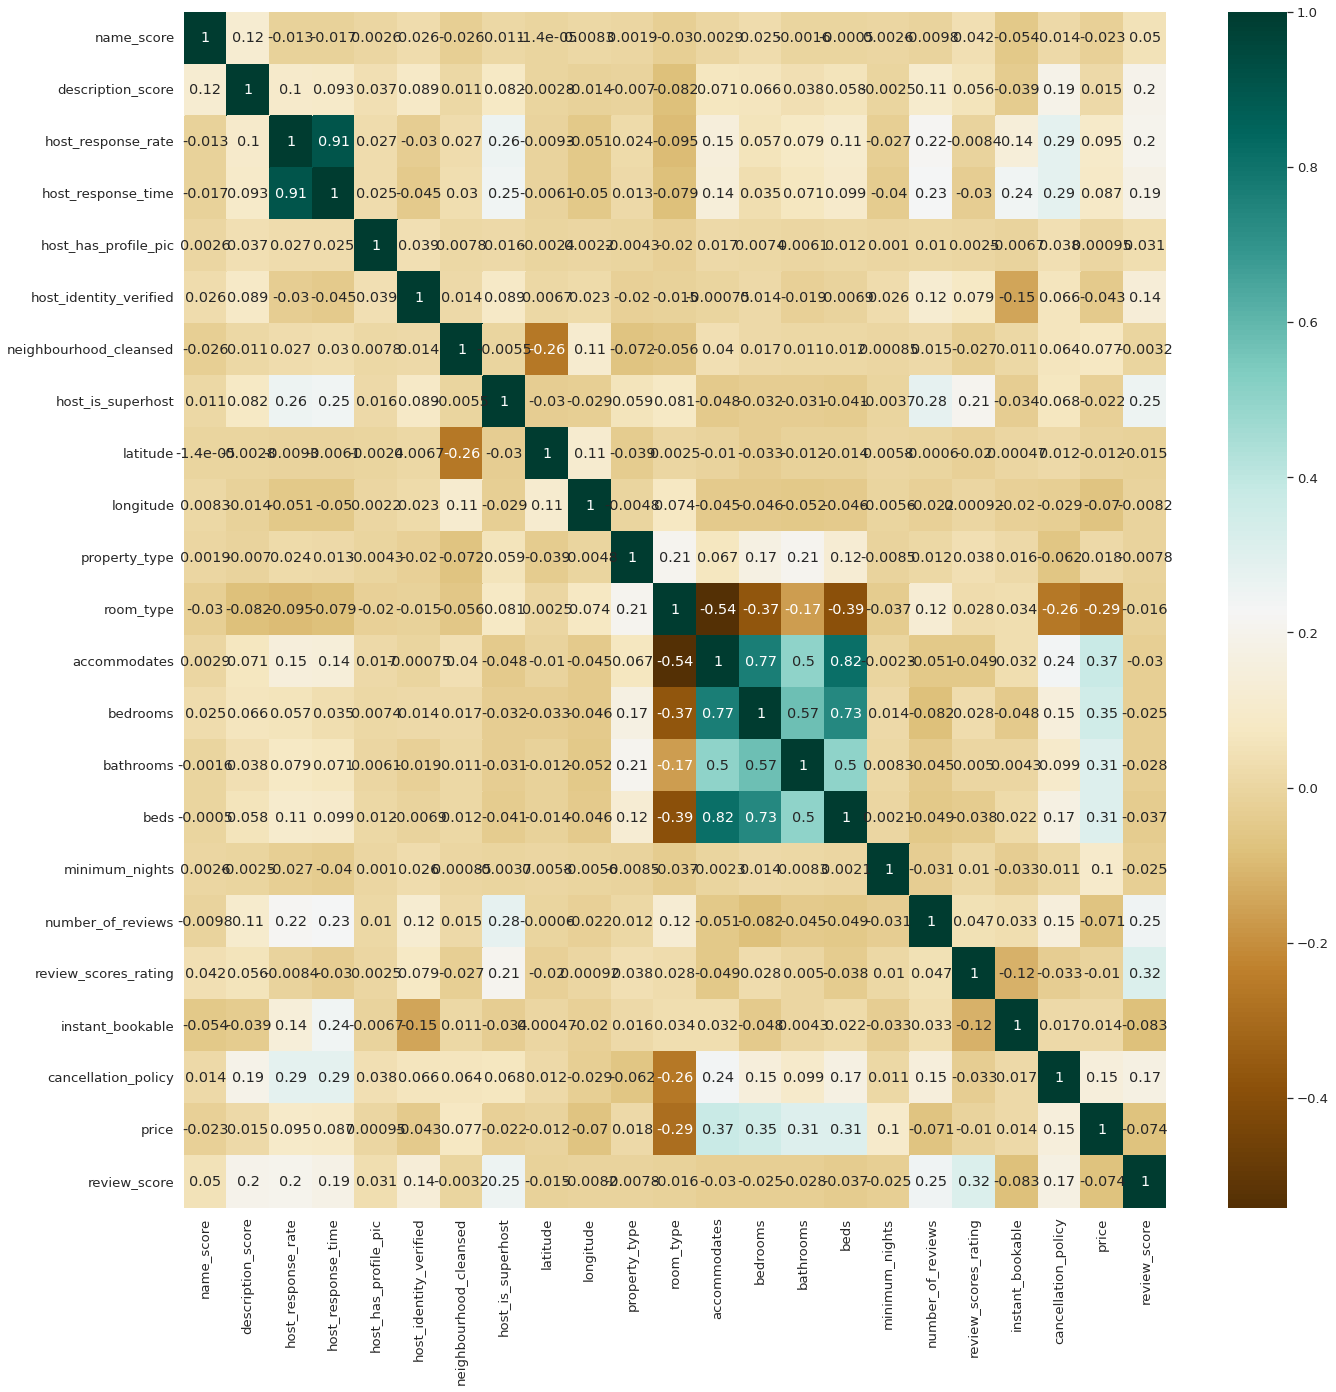

In [ ]:
sns.set(font_scale=1.2)
fig, ax = plt.subplots(figsize=(22, 22))
sns.heatmap(df_final.corr(),cmap="BrBG",annot=True)

As shown above, features like (*host_response_time* and *host_response_rate*), (*beds* and *accommodates*), (*beds* and *bedrroms*), are correlated with each other.

**Plotting the 2D datapoints with seaborn**

In [ ]:
# Standardizing data
standardized_data = StandardScaler().fit_transform(X)
# covariance of matrix
sample_data = standardized_data
cov_matrix = np.matmul(sample_data.T, sample_data)
cov_matrix.shape

(22, 22)

In [ ]:
# Find eigenvalue and corresponding vectors for projecting onto a 2-dim space
from scipy.linalg import eigh
values, vectors = eigh(cov_matrix, eigvals=(20,21))
print(vectors.shape)
vectors = vectors.T
print(vectors.shape)

(22, 2)
(2, 22)


In [ ]:
mean = Y.mean()
std = Y.std()
tem = Y.copy()
tem = tem.to_frame()
tem['label'] = ''
i = 0 
for i in range(tem.shape[0]):
  if (mean-std)< tem['price'][i] < (mean+std):
    tem['label'][i] = 1
  elif (mean-2*std) < tem['price'][i] < (mean+2*std):
    tem['label'][i] = 2
  elif (mean-3*std) < tem['price'][i] < (mean+3*std):
    tem['label'][i] = 3
  else:
    tem['label'][i] = 4
tem.drop(columns='price',inplace=True)
tem = tem.squeeze()

In [ ]:
# projecting the original data sample on the planed formed by two principal
# eigenvectors by vetor-vetor multiplication
new_cord = np.matmul(vectors, sample_data.T)
# appending label to the 2d projected data
# creating a new data frame for plotting the labeled points
new_cord = np.vstack((new_cord, tem)).T
dataframe = pd.DataFrame(data=new_cord, columns=("1st_principal", "2nd_principal", "label"))

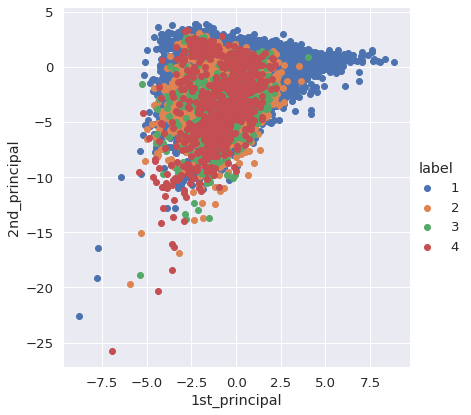

In [ ]:
# plot with seaborn
sns.FacetGrid(dataframe, hue='label', height=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()

**PCA**

In [ ]:
X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

In [ ]:
ss = StandardScaler().fit(X_train)
X_train_ss = ss.transform(X_train)
X_test_ss = ss.transform(X_test)
pca = PCA(n_components=22).fit(X_train_ss)

In [ ]:
np.set_printoptions(suppress=True)
pca.explained_variance_ratio_

array([0.15595997, 0.11259873, 0.07474555, 0.06352303, 0.05708693,
       0.04894397, 0.04744392, 0.04616975, 0.04524231, 0.04410434,
       0.0400094 , 0.03801688, 0.03628081, 0.03344634, 0.03070213,
       0.02960821, 0.02695621, 0.02614013, 0.02081855, 0.01136741,
       0.00683922, 0.0039962 ])

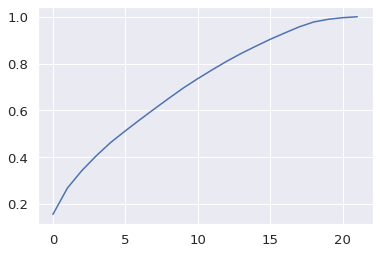

In [ ]:
pc_vs_variance = np.cumsum(pca.explained_variance_ratio_)

pc_vs_variance
plt.plot(pc_vs_variance)

We use the plot above to decide the number of components to keep. The logic is to choose a number that explains at least 99.95% of variance in the dataset. According to the graph, we observe no plateau and the explained_variance_ratio array also suggests that no feature should be removed. Therefore, we choose to keep all the features. 

Conclusion about PCA: Since our linear regression is initially underfitting, it's expected that applying PCA would worsen the result.

## **4.5 Neural Network**



Our Plan: Using MLP package inside SKLearn, we will tune the hyperparameters(hidden layers, activation functions, number of epoch, stop conditions, etc.) to try to find the optimal parameters.

In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression

From source 'Neural Network Design' https://hagan.okstate.edu/NNDesign.pdf#page=469, we identified that in order to prevent over-fitting, trying to keep the number of neurons within hidden layers within an empirical boundary. 

𝑁ℎ=𝑁𝑠(𝛼∗(𝑁𝑖+𝑁𝑜)) 

𝑁𝑖 = number of input neurons.
𝑁𝑜 = number of output neurons.
𝑁𝑠 = number of samples in training data set.
𝛼 = an arbitrary scaling factor usually 2-10

Because we split our data 9:1, the size of the training set would be approximately 80000 instances. Number of input neuron woule be 22 features + 1, output would be 1. By ballparking, the upper boundaries would be from 300 to 1600. We would try different combinations of hidden layers below.



Note that batch size we are using would be min(200, n_samples), activation function we are using would be 'relu', and solver for weight optimization we are using would be 'adam'. If training loss did not improve more than tol=0.000100 for 10/20 consecutive epochs, the training process will be stopped automatically.

In [ ]:
# print out best parameters
def print_best_params(results):
    print('best_params: {}\n'.format(results.best_params_))

In [ ]:
from sklearn.model_selection import GridSearchCV

para = {"hidden_layer_sizes":[(40,40,40),(40,80,160),(160,320,320)]}
nn_cv = GridSearchCV(estimator = MLPRegressor(random_state=42, max_iter=70, learning_rate= "adaptive", learning_rate_init = 0.01), param_grid = para, cv = 3, n_jobs=-1).fit(X_train, Y_train)
print_best_params(nn_cv)

best_params: {'hidden_layer_sizes': (40, 40, 40)}



In [ ]:
nn_cv.best_estimator_.score(X_test, Y_test)

0.5731405843928643

After applying the Neural Network model with the best parameters selected by Grid Search CV, the coefficient of determination of the prediction ($R^2$) is around 0.57. It is better than vanilla linear regression or regularized linear regression, but it is still falling short from our expectation.

## **4.6 Random Forest**
Our plan: Use grid search and train a random forest model on the transformed train dataset. Tune hyperparameters that are available like depth and number of estimators using grid search and select the best hyperparameters out of those.

In [ ]:
para = {"max_depth":[20,40,80], "n_estimators":[10,30,100]}
rf_cv = GridSearchCV(estimator = RandomForestRegressor(), param_grid = para, cv = 3, n_jobs=-1).fit(X_train, Y_train)
print_best_params(rf_cv)

best_params: {'max_depth': 40, 'n_estimators': 100}



In [ ]:
Y_prediction = rf_cv.best_estimator_.predict(X_train)

In [ ]:
Y_test_prediction = rf_cv.best_estimator_.predict(X_test)

In [ ]:
a = Y_train.to_frame()
a = a.reset_index(drop=True)
a['id'] = ''
i = 0
for i in range(a.shape[0]):
  a['id'][i] = i
  i += 1

In [ ]:
df = pd.DataFrame(Y_prediction, columns = ['predicted_price'])
df['id'] = ''
i = 0
for i in range(df.shape[0]):
  df['id'][i] = i
  i += 1

In [ ]:
res = pd.merge(a, df, how='left', on='id')
res.drop(columns='id',inplace=True)

We construct a dataframe that side-by-side displays the actual price and the predicted price produced by our model:

In [ ]:
res.head(5)

,price,predicted_price
0,261.315068,251.667151
1,87.000000,85.823260
2,145.013699,142.517918
3,67.145205,74.493918
4,83.191781,75.577945


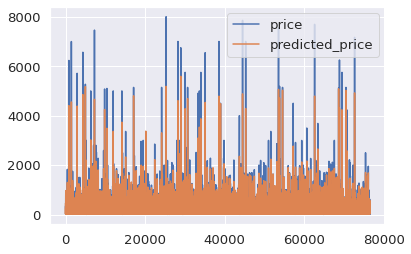

In [ ]:
res.plot()

Besides showing the absolute difference between actual price and predicted price, 

we can construct an additional column to show the ratio of difference:            **(predicted_price-actual_price)/actual_price.**

In [ ]:
res['ratio_of_diff'] = (res['predicted_price'] - res['price'])/res['price']
res_2 = res.ratio_of_diff.abs().to_frame()
cnt_10_perc = 0
cnt_20_perc = 0
cnt_above_20 = 0
i = 0
for i in range(res_2.shape[0]):
  if res_2['ratio_of_diff'][i] <= 0.1:
    cnt_10_perc += 1
  elif res_2['ratio_of_diff'][i] <= 0.2:
    cnt_20_perc += 1
  else:
    cnt_above_20 += 1
  i += 1

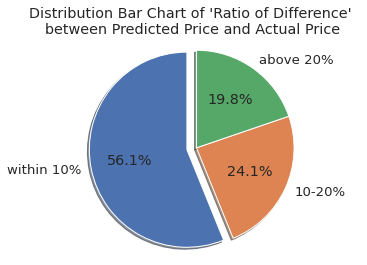

In [ ]:
lst = [cnt_10_perc, cnt_20_perc, cnt_above_20]
labels = ['within 10%', '10-20%', 'above 20%']
sizes = lst
explode = (0.1, 0, 0)  
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal') 
plt.title("Distribution Bar Chart of 'Ratio of Difference' \nbetween Predicted Price and Actual Price")
plt.show()

In [ ]:
print("RMSE = ", mean_squared_error(Y_train, Y_prediction)**0.5)

RMSE =  59.212851945593165


In [ ]:
r2_score(Y_train, Y_prediction)

0.9139027336892165

By comparing RMSE and the above visualization of actual price vs. predicted price, we can see that the performance of random forest has improved a lot compared prior regression methods. 

# **5. Conclusion**



Predicting housing price is a constant endeavor within data science community. Data enthusiasts like us have been trying to transform obscure housings features into clean and interpretable factors with different weights that can shed light on the price. In this final project, we built an offline housing data analytics pipeline from data acquisition, data cleaning and data wrangling to model building and testing. We also implemented abundant data visualizations throughout the notebook to more clearly illustrate our thinking processes and helped us identify errors along the way. We also referred materials inside and outside of the class. 

We spent about two weeks experimenting with different models and constantly going back and forth to modify our feature selection. We can see a huge improvements from linear regression to neural network then to random forest. It is worth noting that at this particular case, random forest outperform other models a lot. For regression task to predict housing prices, the RMSE of random forest is below 60, whereas the RMSE of other models like linear regression and elastic net are all above 140. More than half of the predicted price generated by our random forest model are within a 10% error range of the actual price.

Going beyond this project, we believe that our project has some actual business-wise contributions: we have extracted useful information for housing hosts to make more rational decisions about setting prices for Airbnb housings. Specifically, many features that are often believed to be significant actually have little influence on the price, such as the number of guest reviews and whether the host includes his/her picture to the house listings. Hosts can refer to our project, assign numeric values to their own housing's features, find the price of other houses with similar features, and modify their current price setting.



# **6. Challenges/Obstacles Faced**



The handling of null values is difficult because it's a case-by-case situation: instead of always assigning mean values or always deleting the rows containg null, we decided to fully understand each column, and take different value imputation approaches based on not only the specific column itself but also other relevant columns. For instance, for missing values under the column "beds" (which record the number of beds), we calculated the mean of beds and the result was 1.7. To decide whether we should assgin value "1" or "2" to fill the nulls, we manually checked the property type of housings that didn't have a valid bed number in the original dataset. From such close inspection, we chose to assign value 1 because those housings are mostly private rooms, and thus we believed they are more likely to have only one bed rather than 2. 

At feature engineering stage, we initially planned to combine some external data to our dataset, such as calculating the distance of each Airbnb housing to its nearest Metro classification. However, we had to give up this idea because we already have an overwhelming-large amount of features. 

# **7. Potential Next Steps & Future Direction**

A major improvement that can be made on our project is to incorporate seasonality into consideration. Applying common knowledge, we would expect the time of a year to have a significant influence on Airbnb housings' price. However, due to the limitation of our dataset (only containing 366 days of price data), we can't say for sure whether the price change would always happen at certain time of the year, and therefore, it's hard to reach at a definite conclusion about how prices are going up and down at different time of the year. For future studies, people can try to collect Airbnb housing data in different years to test if prices vary seasonally.

Also, we are using primitive neural network model that didn't utilize adavantages of the neural network model. By further tuning the hyperparameters of the neural network model, we could possible achieve higher accuracy

Another possible improvement is to use other Sentiment Analyzer with higher precision. For instance, some sentiment analysis methods are designed specifically for social media posts, and some are designed for novels. If we can utilize an analyzer that works better with reviews, we are likely to construct a more accurate price predictor.

Another possible future direction is more guest-oriented: Maybe certain customer is malicious and always gives a low rating for whatever house he/she rents, which could introduce bias to the overall rating. A tentative approach to address this quesiton is to perform some analysis to calculate the mean rating score given by each customer, and detect if there's any extremely low value. If so, some manual examination is needed to decide whether the low ratings are reasonable, or should be attributed to guests' unreasonableness.